Basic SVM

In [10]:
import zipfile
import pandas as pd
import os

# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
from sklearn import model_selection

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, learning_curve, cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


Functions

In [11]:
def t_plot_learning_curve(X_train, y_train, classifier, scoring, clf_type):
    if scoring == 'error':
        train_sizes, train_scores, test_scores = learning_curve(
            classifier,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=5),
            scoring='accuracy',
            train_sizes=np.linspace(0.1, 1.0, 50),
            n_jobs=-1
        )
        train_scores_mean = 1-np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = 1-np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
    else:
        train_sizes, train_scores, test_scores = learning_curve(
            classifier,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=5),
            scoring=scoring,
            train_sizes=np.linspace(0.1, 1.0, 50),
            n_jobs=-1
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve ({clf_type})")
    plt.xlabel("Number of training objects")
    plt.ylabel(scoring)
    plt.ylim(0.5,1)

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score", color="blue")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="blue")

    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score", color="green")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="green")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [12]:
# Load data
with zipfile.ZipFile(os.path.join('tm10007_ml','ecg','ecg_data.zip'), 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

# Divide data into test and train
labels = data.iloc[:,-1]
x = data.iloc[:,:-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, labels, test_size=0.25, stratify=labels, random_state=42)


Choose betweeen robust and powertransform

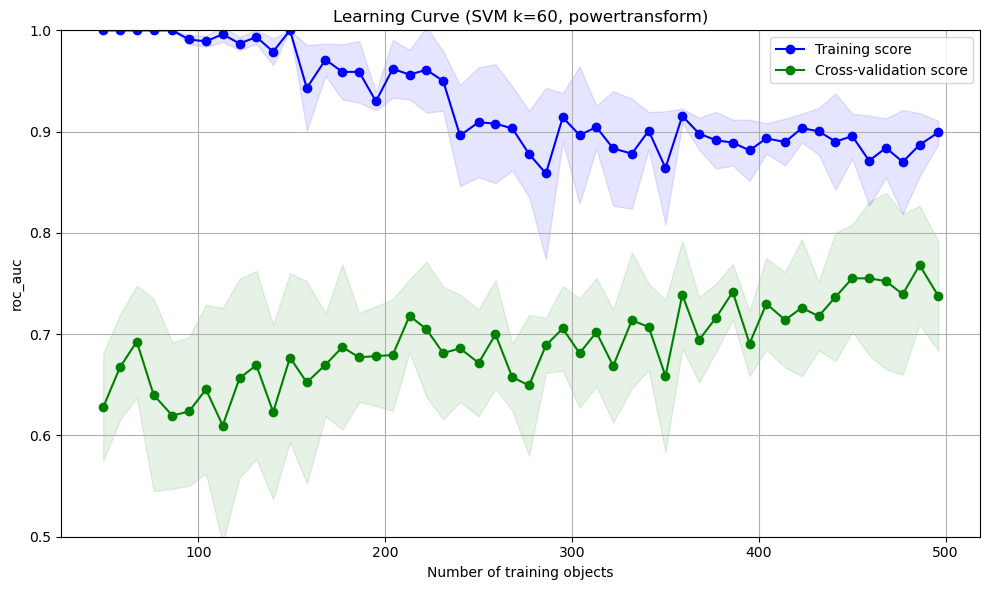

Gemiddelde ROC AUC: 0.7378182164304381


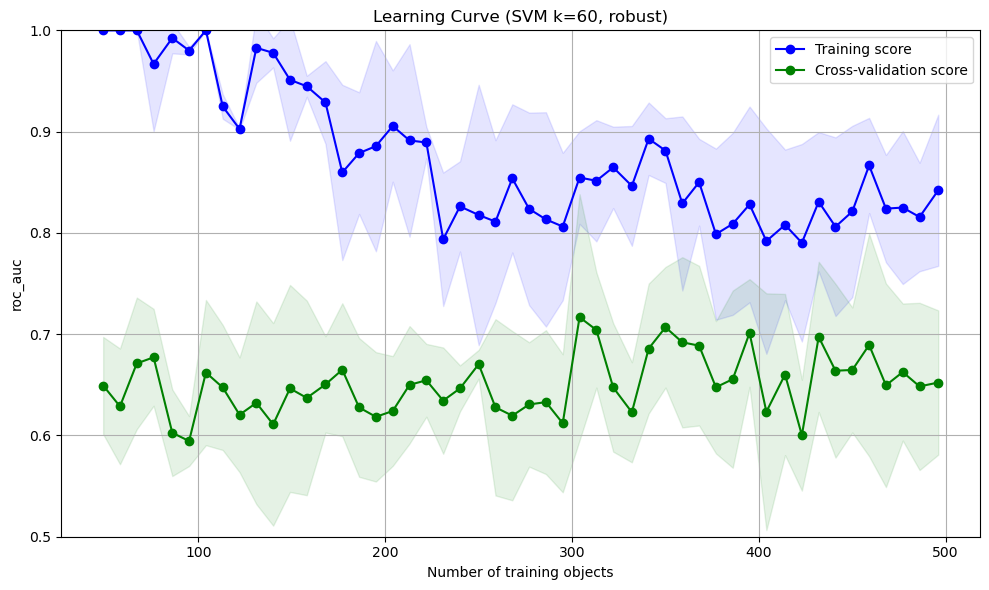

Gemiddelde ROC AUC: 0.6522542468002206


In [13]:
# Powertransform
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=60)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)

t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=60, powertransform')
print("Gemiddelde ROC AUC:", scores.mean())



# robust scaling
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('select_k_best', SelectKBest(f_classif, k=60)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)

t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=60, robust')
print("Gemiddelde ROC AUC:", scores.mean())

K=100

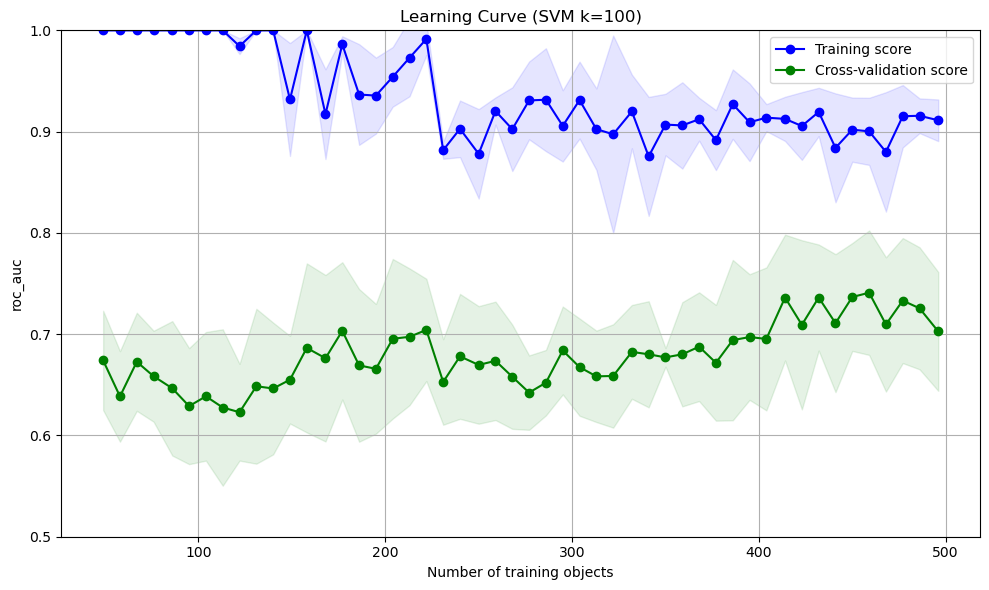

Gemiddelde ROC AUC: 0.7027103868908551
Number of features selected by RFECV: 15


In [14]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=100)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=100')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)


K=80

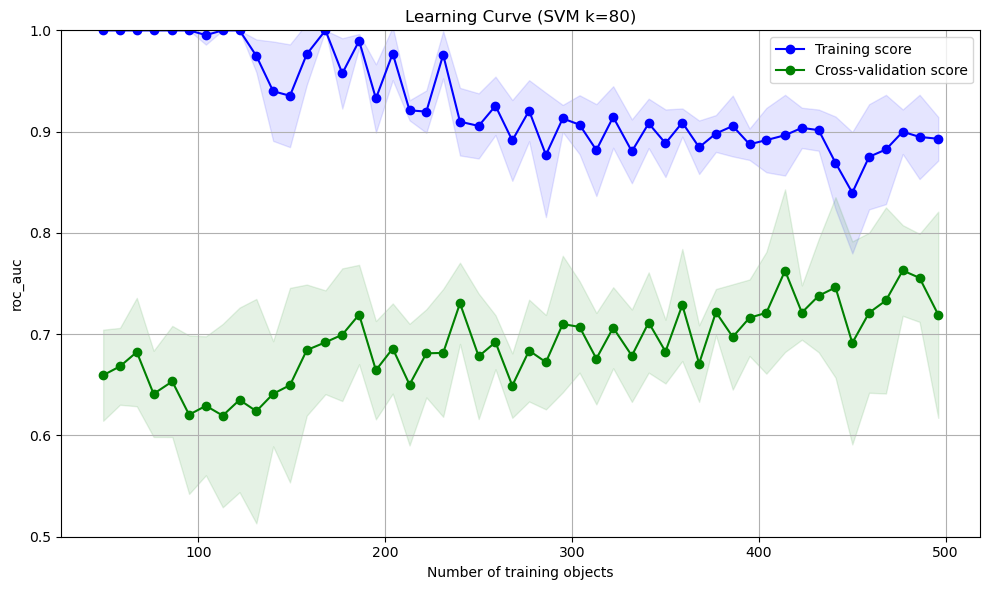

Gemiddelde ROC AUC: 0.7191610978018745
Number of features selected by RFECV: 10


In [15]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=80)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=80')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

K=60

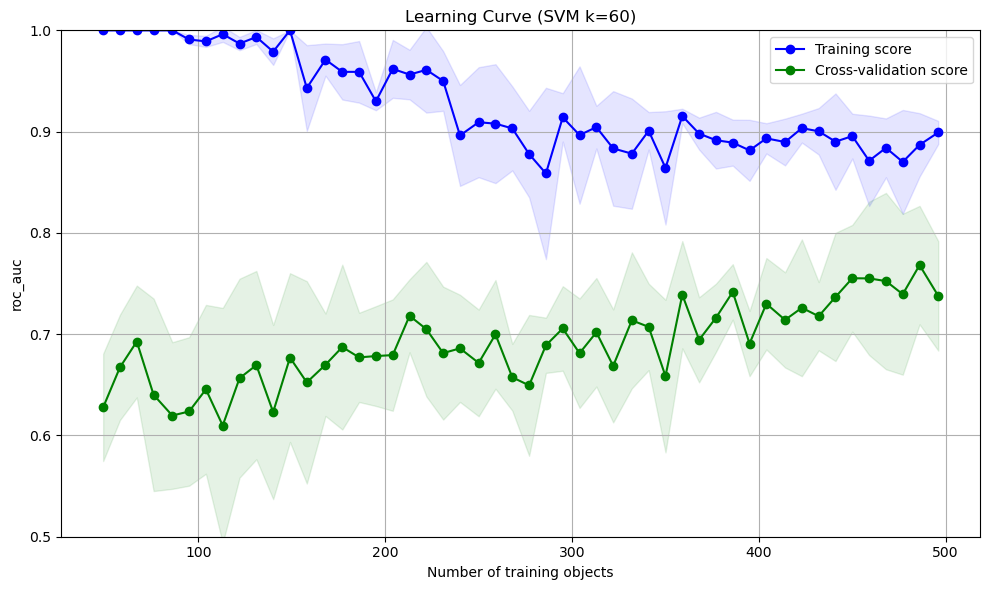

Gemiddelde ROC AUC: 0.7378182164304381
Number of features selected by RFECV: 20


In [16]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=60)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=60')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

K=40

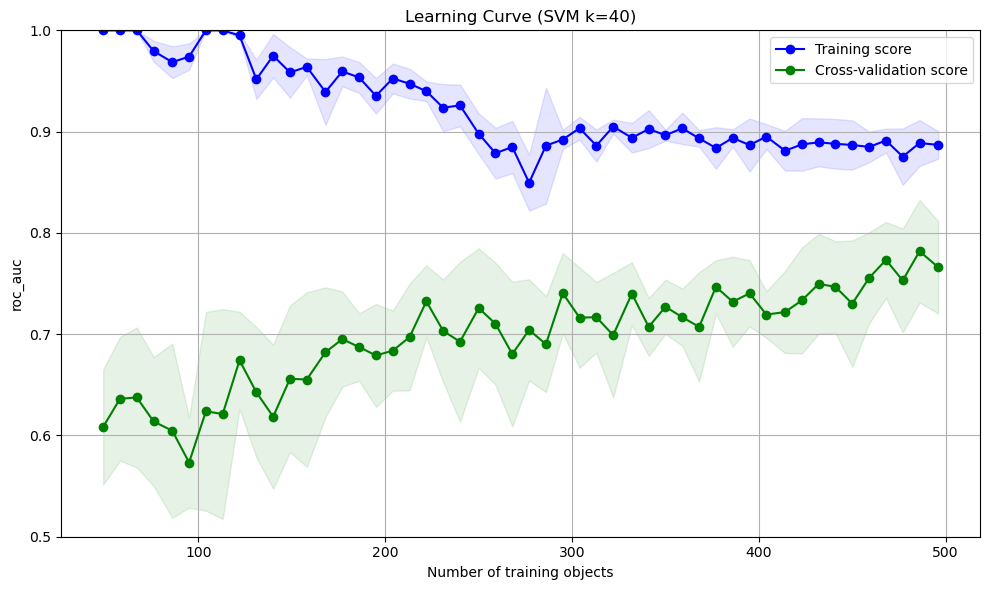

Gemiddelde ROC AUC: 0.7660165743261118
Number of features selected by RFECV: 10


In [17]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=40)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=40')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

K=25

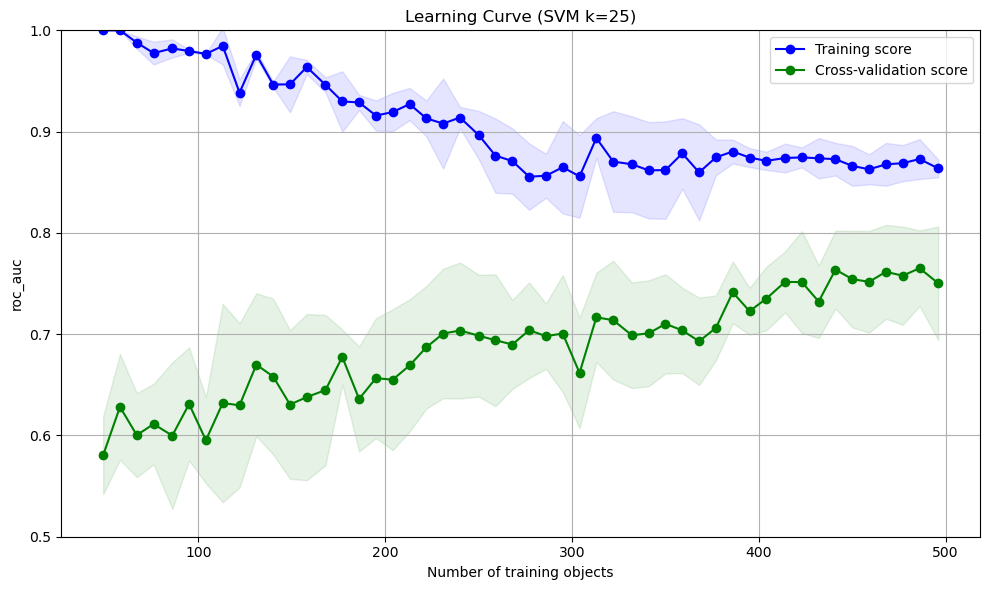

Gemiddelde ROC AUC: 0.7502358578029623
Number of features selected by RFECV: 15


In [19]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=25')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

K=20

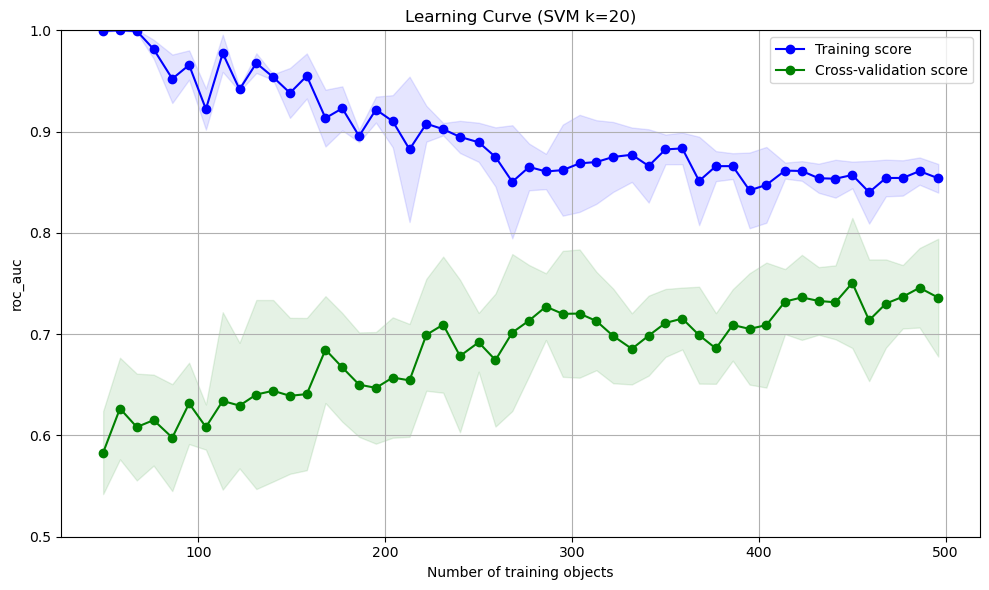

Gemiddelde ROC AUC: 0.7360480467562136
Number of features selected by RFECV: 15


In [18]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=20)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=20')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

K=15

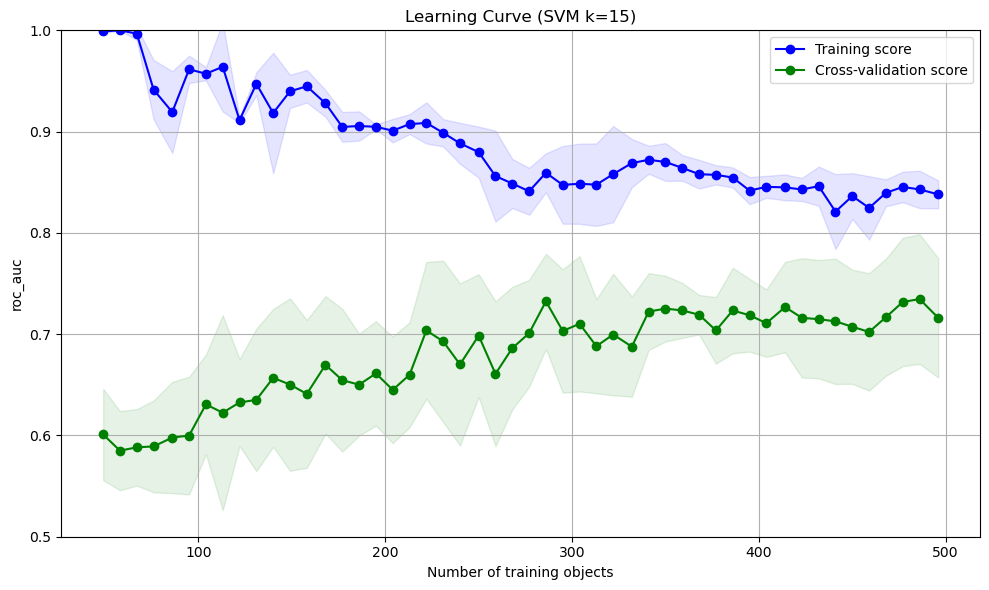

Gemiddelde ROC AUC: 0.7161194221731058
Number of features selected by RFECV: 10


In [20]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(f_classif, k=15)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)


t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM k=15')
print("Gemiddelde ROC AUC:", scores.mean())
print("Number of features selected by RFECV:", pipeline.named_steps['rfecv'].n_features_)

Select correct features

In [4]:
# ====== PRE-FEATURE SELECTION ======
# Apply Power Transformation to handle skewed data
power_transformer = PowerTransformer(method='yeo-johnson')
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

# Use SelectKBest with mutual_info_classif for feature selection
selector = SelectKBest(mutual_info_classif, k=25)
X_train_reduced = selector.fit_transform(X_train_transformed, y_train)
X_test_reduced = selector.transform(X_test_transformed)

# Cross validation
cv = StratifiedKFold(n_splits=5)

# ====== FEATURE SELECTION ======
svm = SVC(kernel="linear", random_state=42)
rfecv = RFECV(estimator=svm, step=5, cv=cv, scoring='roc_auc')
rfecv.fit(X_train_reduced, y_train)
X_selected = rfecv.transform(X_train_reduced)
X_test_selected = rfecv.transform(X_test_reduced)

Kernel = linear (not tuned)

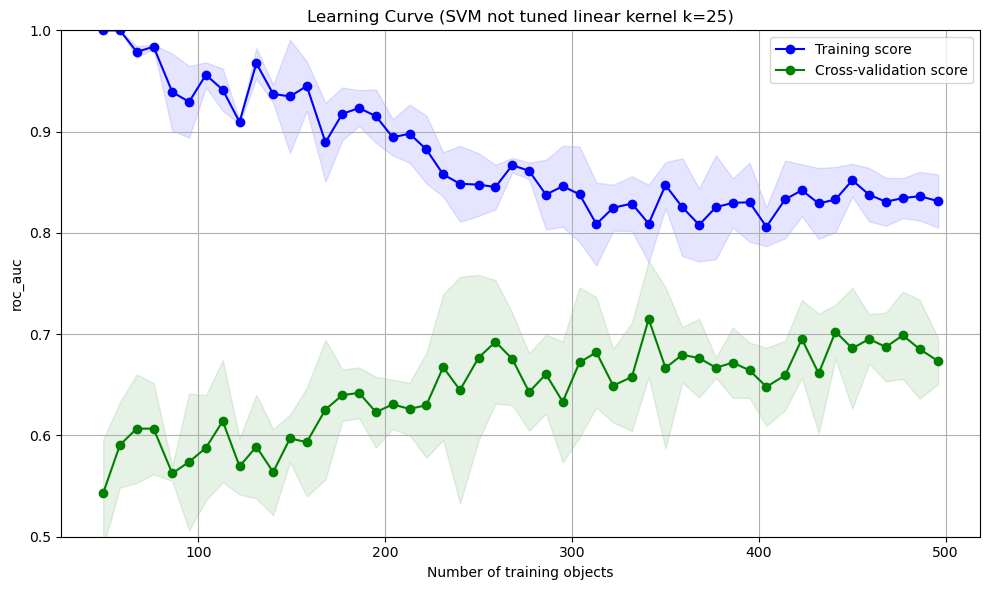

In [5]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)

t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM not tuned linear kernel k=25')

Kernel = linear for tuning

In [25]:
# ====== PIPELINE CHARACTERISTICS ======
svm = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('svm', svm)
])

parameters = {
    'svm__C':            [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__tol':          [1e-4, 1e-5, 1e-6],             
    'svm__max_iter':     [1000, 10000, -1]    
}

# ====== EVALUATION  ======
model = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    n_iter=20,
    n_jobs=-1,
    cv=cv,
    verbose=1,
    refit=True,
    scoring='roc_auc'  
)

model.fit(X_selected, y_train)

print("Best estimator:", model.best_estimator_ )
print("Best Score:", model.best_score_)
print("Best parameters:", model.best_params_)

t_plot_learning_curve(X_selected, y_train, classifier=model.best_estimator_, scoring='roc_auc', clf_type='SVM k=25, linear')
print("Gemiddelde ROC AUC:", model.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

Kernel = linear (tuned) - final

In [ ]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])

parameters = {
    'classifier__C':            [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__tol':          [1e-4, 1e-5, 1e-6],             
    'classifier__max_iter':     [1000, 10000, -1]    
}

# ====== EVALUATION  ======
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=parameters,
    n_iter=20,
    n_jobs=-1,
    cv=cv,
    scoring='roc_auc'  
)

random_search.fit(X_train, y_train)

print("Best estimator:", random_search.best_estimator_ )
print("Best Score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

# t_plot_learning_curve(X_selected, y_train, classifier=model.best_estimator_, scoring='roc_auc', clf_type='SVM k=25, linear')
# print("Gemiddelde ROC AUC:", model.best_score_)

Best estimator: Pipeline(steps=[('transformer', PowerTransformer()),
                ('select_k_best',
                 SelectKBest(k=25,
                             score_func=<function mutual_info_classif at 0x00000241C1508E00>)),
                ('rfecv',
                 RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                       estimator=SVC(class_weight='balanced', kernel='linear',
                                     random_state=42),
                       scoring='roc_auc', step=5)),
                ('classifier',
                 SVC(C=0.001, class_weight='balanced', kernel='linear',
                     max_iter=10000, random_state=42, tol=1e-06))])
Best Score: 0.6979534267369789
Best parameters: {'classifier__tol': 1e-06, 'classifier__max_iter': 10000, 'classifier__C': 0.001}


Kernel = poly

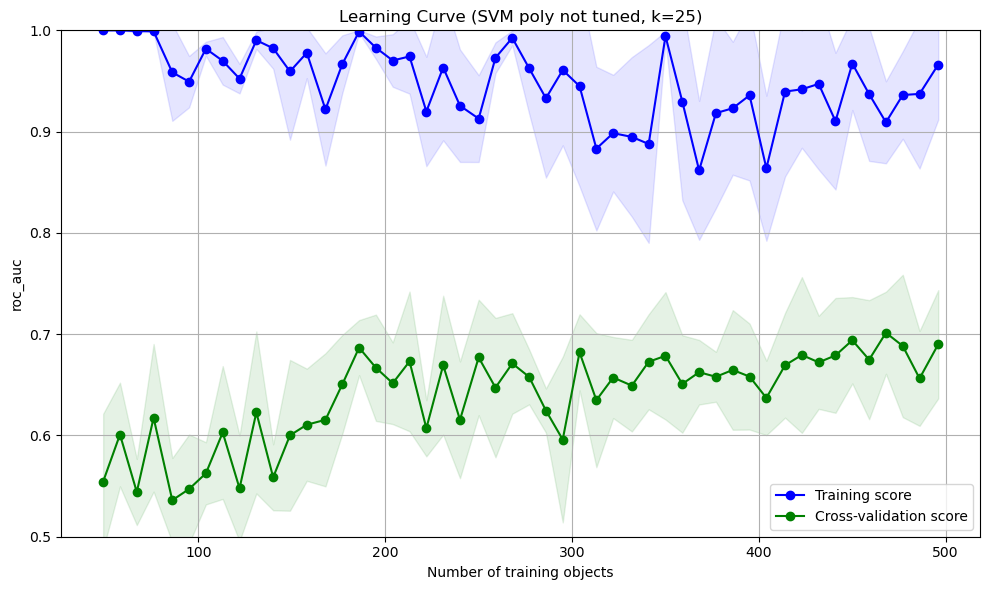

Gemiddelde ROC AUC: 0.6900219046135665


In [6]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel="poly", random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)

t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM poly not tuned, k=25')
print("Gemiddelde ROC AUC:", scores.mean())

Final SVM poly getuned

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste estimator:
 Pipeline(steps=[('transformer', PowerTransformer()),
                ('select_k_best',
                 SelectKBest(k=25,
                             score_func=<function mutual_info_classif at 0x0000024978A00F40>)),
                ('rfecv',
                 RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                       estimator=SVC(class_weight='balanced', kernel='linear',
                                     random_state=42),
                       scoring='roc_auc', step=5)),
                ('classifier',
                 SVC(C=0.01, class_weight='balanced', gamma=1e-06,
                     kernel='poly', max_iter=10000, random_state=42,
                     tol=1e-05))])
Beste ROC AUC-score: 0.6830827035138857
Beste hyperparameters: {'classifier__tol': 1e-05, 'classifier__max_iter': 10000, 'classifier__gamma': 1e-06, 'classifier__C': 0.01}


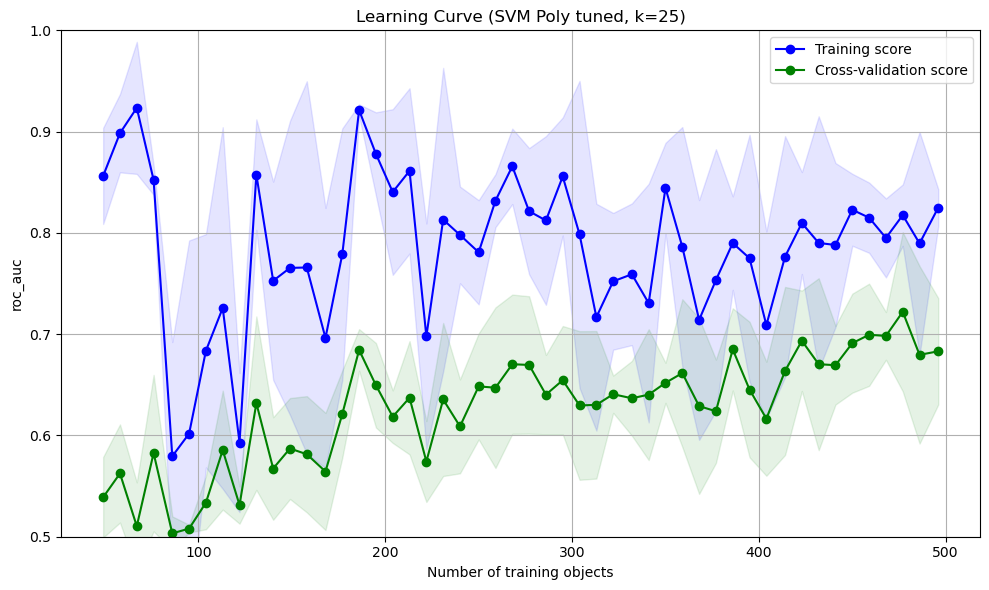

In [7]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel="poly", random_state=42, class_weight='balanced'))
])

# ====== HYPERPARAMETER ======
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1],
    'classifier__gamma': [1e-6, 1e-5, 1e-4],
    'classifier__tol': [1e-4, 1e-5, 1e-6],
    'classifier__max_iter': [1000, 10000, -1]
}


# ====== 3. RANDOMIZED SEARCH MET CROSS-VALIDATIE ======
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# ====== 4. TRAINING ======
random_search.fit(X_train, y_train)

# ====== 5. RESULTATEN ======
print("Beste estimator:\n", random_search.best_estimator_)
print("Beste ROC AUC-score:", random_search.best_score_)
print("Beste hyperparameters:", random_search.best_params_)

# ====== 6. LEARNING CURVE PLOT ======
t_plot_learning_curve(
    X_train,
    y_train,
    classifier=random_search.best_estimator_,
    scoring='roc_auc',
    clf_type='SVM Poly tuned, k=25'
)


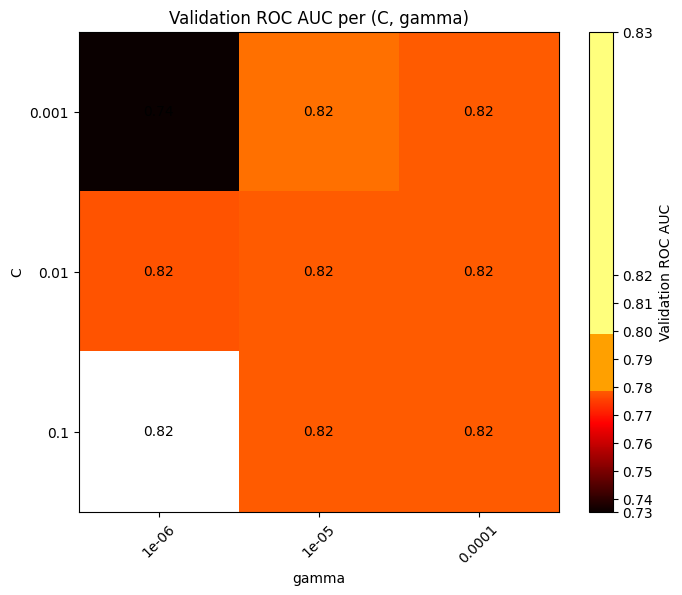

In [ ]:
# ===== MidpointNormalize class =====
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        return np.ma.masked_array(np.interp(value, [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]))

# ===== Extract C and gamma ranges from param_grid =====
C_range = param_grid['svm__C']
gamma_range = param_grid['svm__gamma']

scores = np.full((len(C_range), len(gamma_range)), np.nan)  # initialize with NaN

for idx, result in enumerate(random_search.cv_results_['params']):
    c_val = result['svm__C']
    gamma_val = result['svm__gamma']
    if c_val in C_range and gamma_val in gamma_range:
        c_idx = C_range.index(c_val)
        gamma_idx = gamma_range.index(gamma_val)
        scores[c_idx, gamma_idx] = random_search.cv_results_['mean_test_score'][idx]

# ===== Plot heatmap =====
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)

plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(
        vmin=np.nanmin(scores),
        midpoint=np.nanmedian(scores),
        vmax=np.nanmax(scores)
    )
)

plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar(label='Validation ROC AUC')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation ROC AUC per (C, gamma)")

# ===== ROC =====
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        if not np.isnan(scores[i, j]):
            plt.text(j, i, f"{scores[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

Kernel = RBF

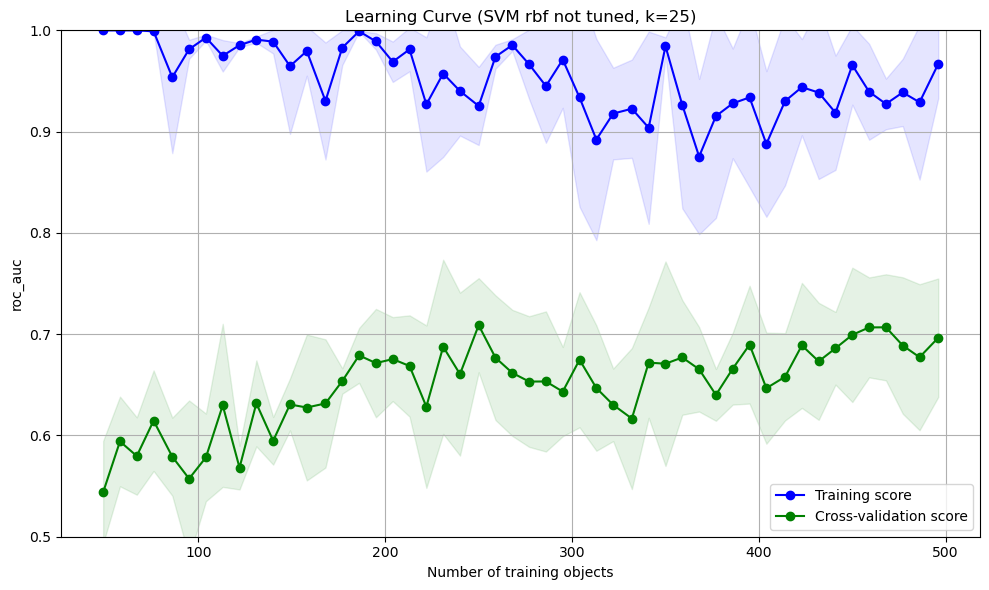

Gemiddelde ROC AUC: 0.6914903295828481


In [8]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel="rbf", random_state=42, class_weight='balanced'))
])


# ====== EVALUATION  ======
scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

pipeline.fit(X_train, y_train)

t_plot_learning_curve(X_train, y_train, classifier=pipeline, scoring='roc_auc', clf_type='SVM rbf not tuned, k=25')
print("Gemiddelde ROC AUC:", scores.mean())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste estimator:
 Pipeline(steps=[('svm',
                 SVC(C=1, class_weight='balanced', gamma=0.01, max_iter=20000,
                     random_state=42, tol=1e-05))])
Beste ROC AUC-score: 0.8370026033361271
Beste hyperparameters: {'svm__tol': 1e-05, 'svm__max_iter': 20000, 'svm__gamma': 0.01, 'svm__C': 1}


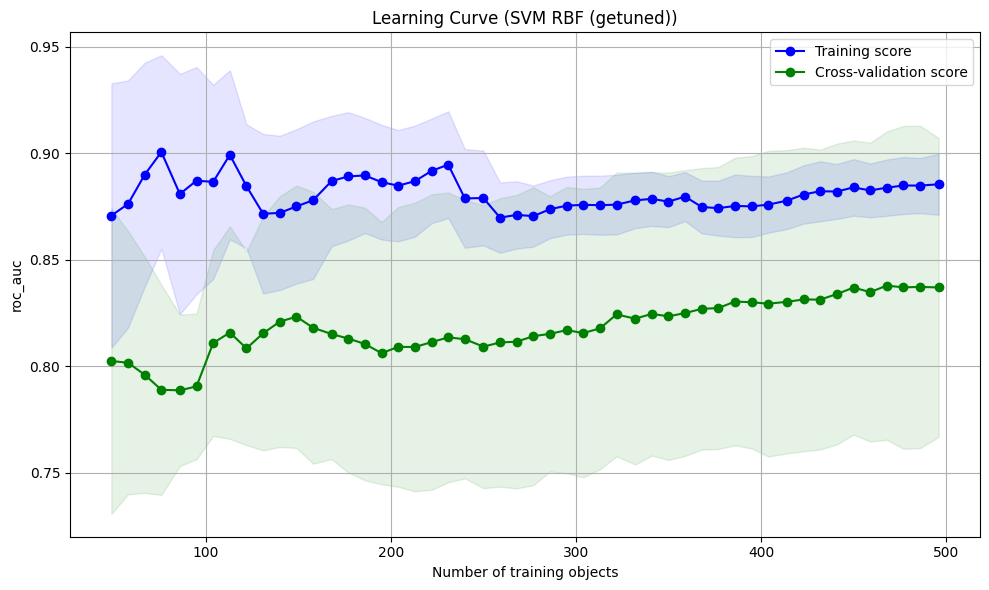

In [ ]:
# ====== PIPELINE CHARACTERISTICS ======
svm = SVC(
    kernel="rbf",
    random_state=42,
    class_weight='balanced'
)

# ====== PIPELINE  ======
pipeline = Pipeline([
    ('svm', svm)
])

# ====== HYPERPARAMETER ======
param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__gamma': [1e-4, 1e-3, 1e-2, 0.1, 1],
    'svm__tol': [1e-3, 1e-4, 1e-5],
    'svm__max_iter': [10000, 20000, -1]
}

# ====== 3. RANDOMIZED SEARCH MET CROSS-VALIDATIE ======
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# ====== 4. TRAINING ======
random_search.fit(X_selected, y_train)

# ====== 5. RESULTATEN ======
print("Beste estimator:\n", random_search.best_estimator_)
print("Beste ROC AUC-score:", random_search.best_score_)
print("Beste hyperparameters:", random_search.best_params_)

# ====== 6. LEARNING CURVE PLOT ======
t_plot_learning_curve(
    X_selected,
    y_train,
    classifier=random_search.best_estimator_,
    scoring='roc_auc',
    clf_type='SVM RBF (getuned)'
)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste ROC AUC-score: 0.8354183509237764
Beste hyperparameters: {'svm__tol': 0.0001, 'svm__max_iter': 1000, 'svm__gamma': 0.01, 'svm__C': 1}


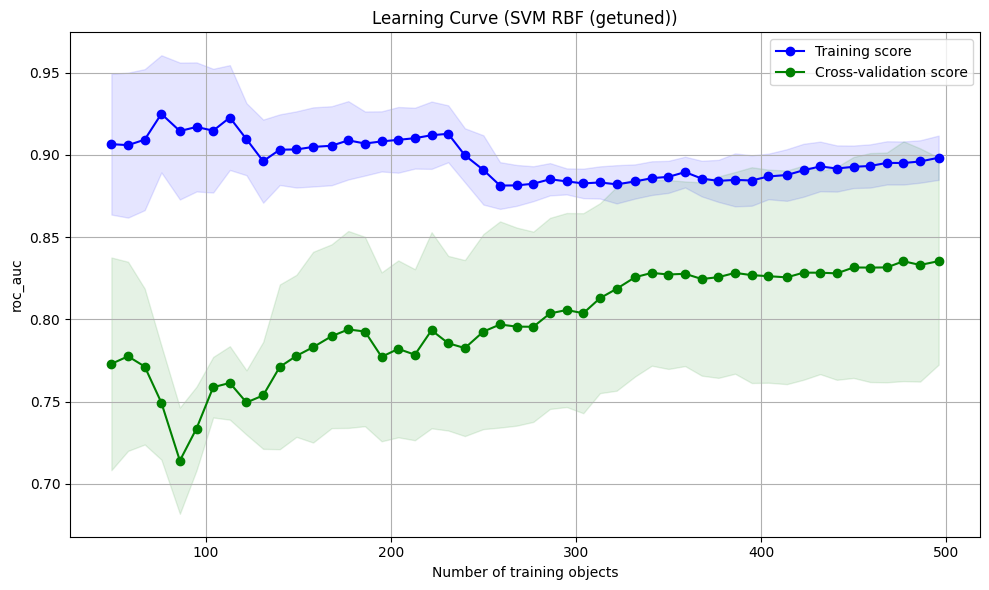

In [ ]:
# ====== SVM & Pipeline Setup ======
pipeline = Pipeline([
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

# ====== Hyperparameter ======
param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__gamma': [1e-5, 1e-4, 1e-3, 1e-2, 0.1],
    'svm__tol': [1e-3, 1e-4, 1e-5],
    'svm__max_iter': [1000, 10000, -1]
}

# ====== Randomized Search CV ======
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,            
    scoring='roc_auc',
    cv=cv,                 
    n_jobs=-1,
    verbose=1,
    refit=True
)

# ====== Fit model op trainingsdata ======
random_search.fit(X_selected, y_train)

# ====== Resultaten tonen ======
print("Beste ROC AUC-score:", random_search.best_score_)
print("Beste hyperparameters:", random_search.best_params_)

# ====== LEARNING CURVE PLOT ======
t_plot_learning_curve(
    X_selected,
    y_train,
    classifier=random_search.best_estimator_,
    scoring='roc_auc',
    clf_type='SVM RBF (getuned)'
)


Final SVM RBF

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Nieuwe beste ROC AUC-score: 0.6869592144006764
Nieuwe beste hyperparameters: {'classifier__tol': 0.0005, 'classifier__max_iter': 10000, 'classifier__gamma': 0.009, 'classifier__C': 5}


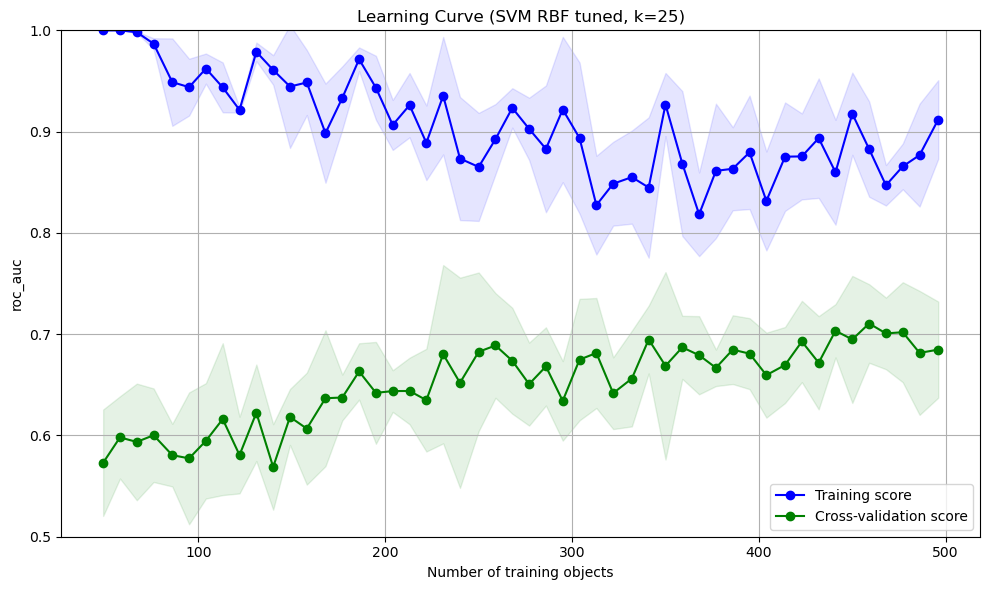

In [9]:
# ====== PIPELINE CHARACTERISTICS ======
cv = StratifiedKFold(n_splits=5)
svm_feature = SVC(kernel="linear", random_state=42, class_weight='balanced')

# ====== SVM & Pipeline Setup ======
pipeline = Pipeline([
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('select_k_best', SelectKBest(mutual_info_classif, k=25)),
    ('rfecv', RFECV(estimator=svm_feature, step=5, cv=cv, scoring='roc_auc')),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

# ====== Nog fijnmaziger Hyperparameter Ruimte ======
param_grid = {
    'classifier__C': [4, 4.5, 5],
    'classifier__gamma': [0.0085, 0.009, 0.0095],
    'classifier__tol': [3e-4, 5e-4, 7e-4],
    'classifier__max_iter': [80000, 10000, -1]
}

# ====== Randomized Search CV ======
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

# ====== Fit model op trainingsdata ======
random_search.fit(X_train, y_train)

# ====== Resultaten tonen ======
print("Nieuwe beste ROC AUC-score:", random_search.best_score_)
print("Nieuwe beste hyperparameters:", random_search.best_params_)

# ====== 6. LEARNING CURVE PLOT ======
t_plot_learning_curve(
    X_train,
    y_train,
    classifier=random_search.best_estimator_,
    scoring='roc_auc',
    clf_type='SVM RBF tuned, k=25'
)



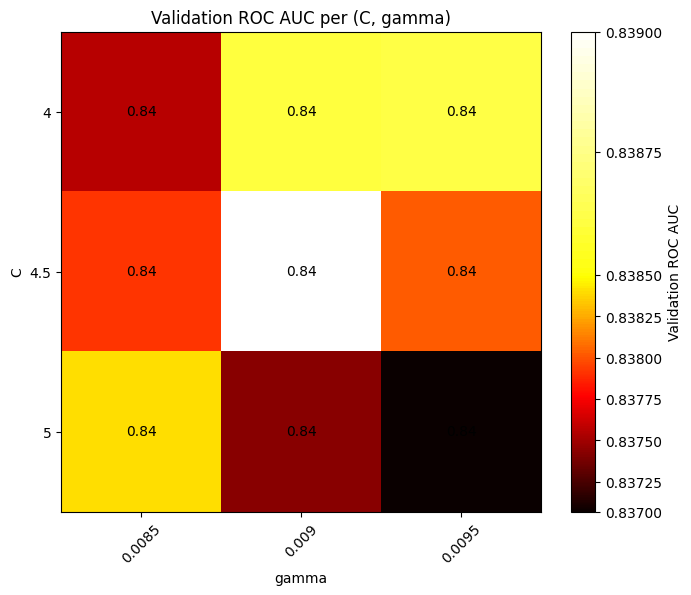

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# ===== MidpointNormalize class =====
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        return np.ma.masked_array(np.interp(value, [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]))

# ===== Extract C and gamma ranges from param_grid =====
C_range = param_grid['svm__C']
gamma_range = param_grid['svm__gamma']

scores = np.full((len(C_range), len(gamma_range)), np.nan)  # initialize with NaN

for idx, result in enumerate(random_search.cv_results_['params']):
    c_val = result['svm__C']
    gamma_val = result['svm__gamma']
    if c_val in C_range and gamma_val in gamma_range:
        c_idx = C_range.index(c_val)
        gamma_idx = gamma_range.index(gamma_val)
        scores[c_idx, gamma_idx] = random_search.cv_results_['mean_test_score'][idx]

# ===== Plot heatmap =====
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)

plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(
        vmin=np.nanmin(scores),
        midpoint=np.nanmedian(scores),
        vmax=np.nanmax(scores)
    )
)

plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar(label='Validation ROC AUC')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation ROC AUC per (C, gamma)")

# ===== ROC =====
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        if not np.isnan(scores[i, j]):
            plt.text(j, i, f"{scores[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

